<a href="https://colab.research.google.com/github/whyonce/testgit/blob/main/Mixmaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds



In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
print('=3')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete9R743B/stanford_dogs-train.tfrecord


  0%|          | 0/12000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete9R743B/stanford_dogs-test.tfrecord


  0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
=3


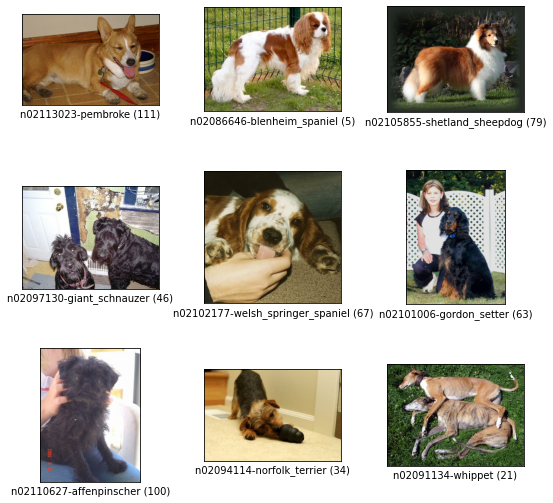

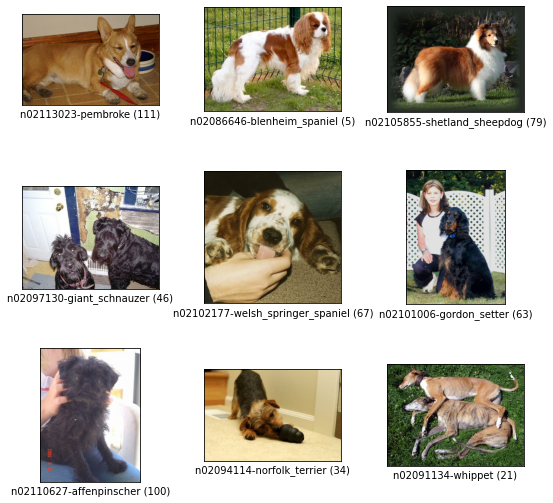

In [ ]:
tfds.show_examples(ds_train, ds_info)

In [ ]:
def normalize_and_resize_img(image, label):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

print('=3')

=3


In [ ]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

print('=3')

=3


In [ ]:
# 데이터셋(ds)을 가공하는 메인함수
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False):
    ds = ds.map(
        normalize_and_resize_img,  # 기본적인 전처리 함수 적용
        num_parallel_calls=2
    )
    if not is_test and with_aug:
        ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

print('=3')

=3


In [ ]:
# make random augment function
def augment2(image,label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

    return image, label

In [ ]:
# make random augment function
def augment3(image,label):
    image = tf.image.central_crop(image, np.random.uniform(0.50, 1.00))
    image = tf.image.resize(image, [224, 224])
    image = tf.clip_by_value(image, 0, 1)
    return image, label

In [ ]:
num_classes = ds_info.features["label"].num_classes
resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

94781440/94765736 [==============================] - 0s 0us/step
=3


In [ ]:
aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

=3


In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_test = apply_normalize_on_dataset(ds_test, is_test=True)
print('=3')

=3


In [ ]:
#EPOCH = 20  # Augentation 적용 효과를 확인하기 위해 필요한 epoch 수
EPOCH = 20

resnet50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy'],
)

history_resnet50_no_aug = resnet50.fit(
    ds_train_no_aug, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


750/750 [==============================] - 105s 117ms/step - loss: 2.2122 - accuracy: 0.4493 - val_loss: 3.4794 - val_accuracy: 0.1874
Epoch 2/20
750/750 [==============================] - 86s 115ms/step - loss: 0.6629 - accuracy: 0.8206 - val_loss: 1.0055 - val_accuracy: 0.7056
Epoch 3/20
750/750 [==============================] - 87s 115ms/step - loss: 0.1797 - accuracy: 0.9681 - val_loss: 0.9229 - val_accuracy: 0.7318
Epoch 4/20
750/750 [==============================] - 86s 115ms/step - loss: 0.0452 - accuracy: 0.9977 - val_loss: 0.8886 - val_accuracy: 0.7413
Epoch 5/20
750/750 [==============================] - 87s 115ms/step - loss: 0.0203 - accuracy: 0.9995 - val_loss: 0.8987 - val_accuracy: 0.7432
Epoch 6/20
750/750 [==============================] - 86s 115ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.9095 - val_accuracy: 0.7441
Epoch 7/20
750/750 [==============================] - 86s 115ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.9310 - val_accuracy: 0.

In [ ]:
aug_resnet50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
)

history_resnet50_aug = aug_resnet50.fit(
    ds_train_aug, # augmentation 적용한 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True
)

Epoch 1/20
750/750 [==============================] - 99s 123ms/step - loss: 2.3097 - accuracy: 0.4217 - val_loss: 3.1248 - val_accuracy: 0.2393
Epoch 2/20
750/750 [==============================] - 87s 117ms/step - loss: 0.9473 - accuracy: 0.7300 - val_loss: 1.4326 - val_accuracy: 0.5929
Epoch 3/20
750/750 [==============================] - 86s 115ms/step - loss: 0.4830 - accuracy: 0.8731 - val_loss: 1.1214 - val_accuracy: 0.6810
Epoch 4/20
750/750 [==============================] - 86s 115ms/step - loss: 0.2483 - accuracy: 0.9415 - val_loss: 1.0661 - val_accuracy: 0.6976
Epoch 5/20
750/750 [==============================] - 87s 115ms/step - loss: 0.1286 - accuracy: 0.9752 - val_loss: 1.0367 - val_accuracy: 0.7113
Epoch 6/20
750/750 [==============================] - 86s 115ms/step - loss: 0.0701 - accuracy: 0.9902 - val_loss: 0.9754 - val_accuracy: 0.7301
Epoch 7/20
750/750 [==============================] - 87s 116ms/step - loss: 0.0454 - accuracy: 0.9956 - val_loss: 0.9628 - val_ac

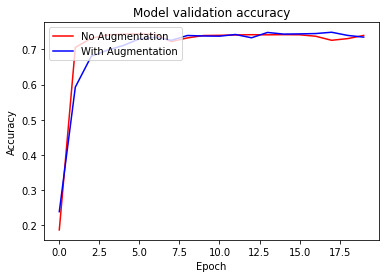

In [ ]:
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation'], loc='upper left')
plt.show()

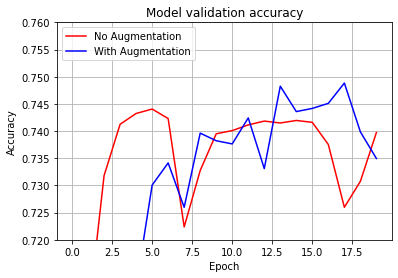

In [ ]:
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation'], loc='upper left')
plt.grid(True)
#plt.ylim(0.50, 0.80)    # 출력하고자 하는  Accuracy 범위를 지정해 주세요. 
plt.ylim(0.72, 0.76)  # EPOCH=20으로 진행한다면 이 범위가 적당합니다. 
plt.show()

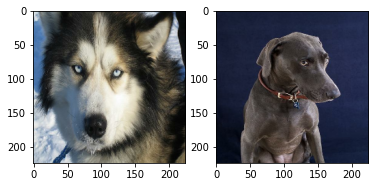

In [ ]:
import matplotlib.pyplot as plt

# 데이터셋에서 이미지 2개를 가져옵니다. 
for i, (image, label) in enumerate(ds_train_no_aug.take(1)):
    if i == 0:
        image_a = image[0]
        image_b = image[1]
        label_a = label[0]
        label_b = label[1]
        break

plt.subplot(1,2,1)
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.imshow(image_b)

plt.show()

In [ ]:
def get_clip_box(image_a, image_b):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0]
    
    # get center of box
    x = tf.cast(tf.random.uniform([], 0, image_size_x), tf.int32)
    y = tf.cast(tf.random.uniform([], 0, image_size_y), tf.int32)

    # get width, height of box
    width = tf.cast(image_size_x*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    height = tf.cast(image_size_y*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    
    # clip box in image and get minmax bbox
    x_min = tf.math.maximum(0, x-width//2)
    y_min = tf.math.maximum(0, y-height//2)
    x_max = tf.math.minimum(image_size_x, x+width//2)
    y_max = tf.math.minimum(image_size_y, y+width//2)
    
    return x_min, y_min, x_max, y_max

x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)

print('x : ', x_min, x_max)
print('y : ', y_min, y_max)

x :  tf.Tensor(135, shape=(), dtype=int32) tf.Tensor(197, shape=(), dtype=int32)
y :  tf.Tensor(41, shape=(), dtype=int32) tf.Tensor(148, shape=(), dtype=int32)


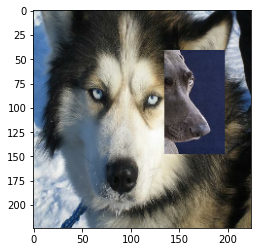

In [ ]:
# mix two images
def mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    middle_left = image_a[y_min:y_max, 0:x_min, :] # image_b의 왼쪽 바깥 영역
    middle_center = image_b[y_min:y_max, x_min:x_max, :]  # image_b의 안쪽 영역
    middle_right = image_a[y_min:y_max, x_max:image_size_x, :] # image_b의 오른쪽 바깥 영역
    middle = tf.concat([middle_left,middle_center,middle_right], axis=1)
    top = image_a[0:y_min, :, :]
    bottom = image_a[y_max:image_size_y, :, :]
    mixed_img = tf.concat([top, middle, bottom],axis=0)
    
    return mixed_img

mixed_img = mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max)
plt.imshow(mixed_img.numpy())
plt.show()

In [ ]:
# mix two labels
def mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max, num_classes=120):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    mixed_area = (x_max-x_min)*(y_max-y_min)
    total_area = image_size_x*image_size_y
    ratio = tf.cast(mixed_area/total_area, tf.float32)

    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_label = (1-ratio)*label_a + ratio*label_b
    return mixed_label

mixed_label = mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max)
mixed_label

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.1322146, 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
   

In [ ]:
def cutmix(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0, batch_size),tf.int32)
        image_b = image[j]
        label_b = label[j]
        x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)
        mixed_imgs.append(mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max))
        mixed_labels.append(mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max))

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

print('=3')

=3


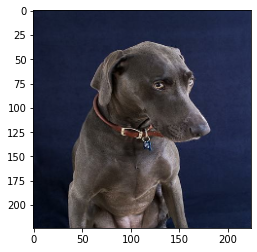

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.99798226 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00201774 0.         0.         

In [ ]:
# function for mixup
def mixup_2_images(image_a, image_b, label_a, label_b):
    ratio = tf.random.uniform([], 0, 1)
    
    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_image= (1-ratio)*image_a + ratio*image_b
    mixed_label = (1-ratio)*label_a + ratio*label_b
    
    return mixed_image, mixed_label

mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
plt.imshow(mixed_img.numpy())
plt.show()
print(mixed_label)

In [ ]:
def mixup(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0,batch_size), tf.int32)
        image_b = image[j]
        label_b = label[j]
        mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
        mixed_imgs.append(mixed_img)
        mixed_labels.append(mixed_label)

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

print('=3')

=3


In [ ]:
def normalize_and_resize_img(image, label):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.clip_by_value(image, 0, 1)
    return image, label
def onehot(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

In [ ]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False, with_aug2=False ,with_cutmix=False, with_mixup=False):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )
    if not is_test and with_aug:
        ds = ds.map(
            augment
        )
    elif not is_test and with_aug2:
          ds = ds.map(
            augment2
          )
    ds = ds.batch(batch_size)
    if not is_test and with_cutmix:
        ds = ds.map(
            cutmix,
            num_parallel_calls=2
        )
    elif not is_test and with_mixup:
          ds = ds.map(
             mixup,
             num_parallel_calls=2
          )
    else:
        ds = ds.map(
            onehot,
            num_parallel_calls=2
        )
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds



In [ ]:
num_classes = ds_info.features["label"].num_classes

In [ ]:
aug2_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

=3


In [ ]:
cutmix_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])


In [ ]:
mixup_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

=3


In [ ]:
aug_mixup_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

=3


In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_train_aug2 = apply_normalize_on_dataset(ds_train, with_aug2=True)
ds_train_no_aug_cutmix = apply_normalize_on_dataset(ds_train, with_aug=False, with_cutmix=True)
ds_train_no_aug_mixup = apply_normalize_on_dataset(ds_train, with_aug=False, with_mixup=True)
ds_train_aug_mixup = apply_normalize_on_dataset(ds_train, with_aug=True, with_mixup=True)
ds_test = apply_normalize_on_dataset(ds_test, is_test=True)
print('=3')

=3


In [ ]:
aug2_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy'],
)

history_resnet50_aug2 = aug2_resnet50.fit(
    ds_train_aug2, # augmentation 적용한 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True
)

Epoch 1/20
750/750 [==============================] - 96s 118ms/step - loss: 3.1619 - accuracy: 0.2446 - val_loss: 3.4802 - val_accuracy: 0.1804
Epoch 2/20
750/750 [==============================] - 89s 118ms/step - loss: 1.8837 - accuracy: 0.4825 - val_loss: 2.0611 - val_accuracy: 0.4447
Epoch 3/20
750/750 [==============================] - 88s 117ms/step - loss: 1.4739 - accuracy: 0.5880 - val_loss: 1.7673 - val_accuracy: 0.5224
Epoch 4/20
750/750 [==============================] - 88s 117ms/step - loss: 1.1573 - accuracy: 0.6714 - val_loss: 1.7006 - val_accuracy: 0.5309
Epoch 5/20
750/750 [==============================] - 88s 118ms/step - loss: 0.9133 - accuracy: 0.7403 - val_loss: 1.9027 - val_accuracy: 0.5152
Epoch 6/20
750/750 [==============================] - 88s 117ms/step - loss: 0.7547 - accuracy: 0.7853 - val_loss: 1.5960 - val_accuracy: 0.5715
Epoch 7/20
750/750 [==============================] - 88s 117ms/step - loss: 0.7264 - accuracy: 0.7886 - val_loss: 1.5492 - val_ac

In [ ]:
EPOCH = 20  # Augentation 적용 효과를 확인하기 위해 필요한 epoch 수
#EPOCH = 3

cutmix_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy'],
)

history_cutmix_resnet50_no_aug = cutmix_resnet50.fit(
    ds_train_no_aug_cutmix, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 97s 121ms/step - loss: 3.8512 - accuracy: 0.2062 - val_loss: 3.6147 - val_accuracy: 0.1611
Epoch 2/20
750/750 [==============================] - 89s 118ms/step - loss: 2.9400 - accuracy: 0.4314 - val_loss: 1.3514 - val_accuracy: 0.6257
Epoch 3/20
750/750 [==============================] - 88s 118ms/step - loss: 2.6266 - accuracy: 0.5372 - val_loss: 1.3577 - val_accuracy: 0.6316
Epoch 4/20
750/750 [==============================] - 88s 118ms/step - loss: 2.4217 - accuracy: 0.5990 - val_loss: 1.2555 - val_accuracy: 0.6589
Epoch 5/20
750/750 [==============================] - 88s 118ms/step - loss: 2.2752 - accuracy: 0.6563 - val_loss: 1.2099 - val_accuracy: 0.6705
Epoch 6/20
750/750 [==============================] - 88s 118ms/step - loss: 2.1499 - accuracy: 0.6922 - val_loss: 1.1523 - val_accuracy: 0.6831
Epoch 7/20
750/750 [==============================] - 88s 118ms/step - loss: 2.0594 - accuracy: 0.7159 - val_loss: 1.2844 - val_ac

In [ ]:
EPOCH = 20  # Augentation 적용 효과를 확인하기 위해 필요한 epoch 수
#EPOCH = 3

mixup_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy'],
)

history_mixup_resnet50_no_aug = mixup_resnet50.fit(
    ds_train_no_aug_mixup, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 96s 119ms/step - loss: 3.7285 - accuracy: 0.2388 - val_loss: 3.7528 - val_accuracy: 0.1467
Epoch 2/20
750/750 [==============================] - 88s 118ms/step - loss: 2.8701 - accuracy: 0.4733 - val_loss: 1.5197 - val_accuracy: 0.5760
Epoch 3/20
750/750 [==============================] - 89s 118ms/step - loss: 2.5717 - accuracy: 0.5881 - val_loss: 1.4538 - val_accuracy: 0.6045
Epoch 4/20
750/750 [==============================] - 89s 118ms/step - loss: 2.3993 - accuracy: 0.6552 - val_loss: 1.2836 - val_accuracy: 0.6423
Epoch 5/20
750/750 [==============================] - 89s 118ms/step - loss: 2.2356 - accuracy: 0.7093 - val_loss: 1.2638 - val_accuracy: 0.6505
Epoch 6/20
750/750 [==============================] - 89s 118ms/step - loss: 2.1380 - accuracy: 0.7545 - val_loss: 1.2176 - val_accuracy: 0.6688
Epoch 7/20
750/750 [==============================] - 89s 118ms/step - loss: 2.0783 - accuracy: 0.7733 - val_loss: 1.2714 - val_ac

In [ ]:
EPOCH = 20  # Augentation 적용 효과를 확인하기 위해 필요한 epoch 수
#EPOCH = 3

aug_mixup_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy'],
)

history_mixup_resnet50_aug = aug_mixup_resnet50.fit(
    ds_train_aug_mixup, # augmentation 적용하지 않은 데이터셋 사용
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
750/750 [==============================] - 97s 120ms/step - loss: 3.7736 - accuracy: 0.2240 - val_loss: 3.7207 - val_accuracy: 0.1621
Epoch 2/20
750/750 [==============================] - 91s 122ms/step - loss: 2.9453 - accuracy: 0.4442 - val_loss: 1.4606 - val_accuracy: 0.5863
Epoch 3/20
750/750 [==============================] - 96s 128ms/step - loss: 2.6846 - accuracy: 0.5408 - val_loss: 1.3934 - val_accuracy: 0.6087
Epoch 4/20
750/750 [==============================] - 91s 122ms/step - loss: 2.5217 - accuracy: 0.6032 - val_loss: 1.5649 - val_accuracy: 0.5767
Epoch 5/20
750/750 [==============================] - 91s 122ms/step - loss: 2.3957 - accuracy: 0.6479 - val_loss: 1.3234 - val_accuracy: 0.6349
Epoch 6/20
750/750 [==============================] - 91s 121ms/step - loss: 2.2938 - accuracy: 0.6899 - val_loss: 1.1886 - val_accuracy: 0.6728
Epoch 7/20
750/750 [==============================] - 91s 122ms/step - loss: 2.1962 - accuracy: 0.7197 - val_loss: 1.2121 - val_ac

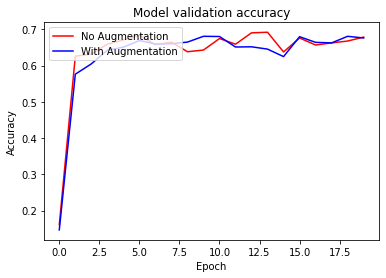

In [ ]:
plt.plot(history_cutmix_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_mixup_resnet50_no_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation'], loc='upper left')
plt.show()

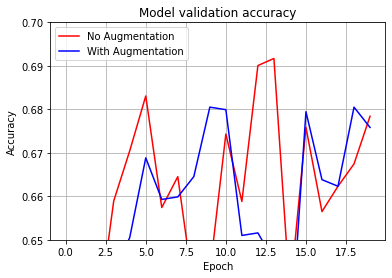

In [ ]:
plt.plot(history_cutmix_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_mixup_resnet50_no_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation'], loc='upper left')
plt.grid(True)
#plt.ylim(0.50, 0.80)    # 출력하고자 하는  Accuracy 범위를 지정해 주세요. 
plt.ylim(0.65, 0.70)  # EPOCH=20으로 진행한다면 이 범위가 적당합니다. 
plt.show()

# 무조건 자르고 섞거나 두 사진을 겹친다고 해서 성능이 좋아지지는 않았다.